In [1]:
# data preparation 
from numpy import array
import numpy as np  
import numpy.matlib
import pandas as pd
import time
import datetime

In [2]:
# Create a dataframe from 2015 to 2019 with demand data
file1 = 'demand_2015.csv'
file2 = 'demand_2016.csv'
file3 = 'demand_2017.csv'
file4 = 'demand_2018.csv'
file5 = 'demand_2019.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)
df5 = pd.read_csv(file5)

df_d = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df_demand = df_d

# Create a dataframe from 2015 to 2019 with price data
file11 = 'HOEP_2015.csv'
file12 = 'HOEP_2016.csv'
file13 = 'HOEP_2017.csv'
file14 = 'HOEP_2018.csv'
file15 = 'HOEP_2019.csv'

df11 = pd.read_csv(file11)
df12 = pd.read_csv(file12)
df13 = pd.read_csv(file13)
df14 = pd.read_csv(file14)
df15 = pd.read_csv(file15)

df_p = pd.concat([df11, df12, df13, df14, df15], ignore_index=True)
df_price = df_p

In [3]:
# Keep desired columns only.
df_price['Hour'] = df_demand.Hour
df_price['MktDem'] = df_demand['Market Demand']
df_price['OntDem'] = df_demand['Ontario Demand']

cols_of_interest = ["Date", "Hour", "MktDem", "OntDem", "HOEP"]
df = df_price[cols_of_interest]

# Creating month and weekday columns in existing dataframe
import time
import datetime

df['Date'] = pd.to_datetime(df['Date'])
#df['Month'] = df['Date'].dt.strftime('%m')
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.dayofweek
df['Year'] = df['Date'].dt.year

# Adding weather data to dataset
import pandas as pd
file_weather = 'weather__2015_2019.csv'
df_w = pd.read_csv(file_weather)

df = pd.concat([df, df_w], axis=1)
df.drop(["Time"], axis = 1, inplace = True)
# Reordering columns
df = df[['Date','Hour','Year','Month','Weekday','HOEP','MktDem','OntDem','Temp(C)','Stn_Press(kPa)']]

# Create column for Seasons.
# Seasons are created as follow:
# winter: dec 1 - feb 28/29,  # spring: mar 1 - may 31,  # summer: jun 1 - aug 31,  # fall: sept 1 - nov 30
    
def f(x):
    if x in range(3,5):
        return  1
    else:
        if x in range(6,8):
            return 2
        else:
            if x in range(9,11):
                return 3
            else:
                return 0

df['Season'] = df['Month'].apply(f)   

<ipython-input-3-486f2e0527ea>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-3-486f2e0527ea>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
<ipython-input-3-486f2e0527ea>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [4]:
df[df['Temp(C)'].isna()]

,Date,Hour,Year,Month,Weekday,HOEP,MktDem,OntDem,Temp(C),Stn_Press(kPa),Season
382,2015-01-16,23,2015,1,4,32.02,20404,18484,NaN,NaN,0
383,2015-01-16,24,2015,1,4,24.97,19036,17314,NaN,NaN,0
384,2015-01-17,1,2015,1,5,32.15,18686,16572,NaN,NaN,0
385,2015-01-17,2,2015,1,5,24.10,17996,15991,NaN,NaN,0
386,2015-01-17,3,2015,1,5,43.46,18062,15775,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
40667,2019-08-22,12,2019,8,3,23.78,19293,17079,NaN,NaN,0
40668,2019-08-22,13,2019,8,3,24.42,19446,17232,NaN,NaN,0
40669,2019-08-22,14,2019,8,3,24.45,19580,17394,NaN,NaN,0
40670,2019-08-22,15,2019,8,3,24.35,19812,17517,NaN,NaN,0


In [12]:
# Create lags for HOEP
df['HOEP_lag1']= df['HOEP'].shift(1)
df['HOEP_lag2']= df['HOEP'].shift(2)
df['HOEP_lag3']= df['HOEP'].shift(3)
df['HOEP_lag4']= df['HOEP'].shift(4)
df['HOEP_lag5']= df['HOEP'].shift(5)
df['HOEP_lag6']= df['HOEP'].shift(6)
df['HOEP_lag7']= df['HOEP'].shift(7)
df['HOEP_lag8']= df['HOEP'].shift(8)
df['HOEP_lag9']= df['HOEP'].shift(9)
df['HOEP_lag10']= df['HOEP'].shift(10)
df['HOEP_lag11']= df['HOEP'].shift(11)
df['HOEP_lag12']= df['HOEP'].shift(12)
df['HOEP_lag13']= df['HOEP'].shift(13)
df['HOEP_lag14']= df['HOEP'].shift(14)
df['HOEP_lag15']= df['HOEP'].shift(15)
df['HOEP_lag16']= df['HOEP'].shift(16)
df['HOEP_lag17']= df['HOEP'].shift(17)
df['HOEP_lag18']= df['HOEP'].shift(18)
df['HOEP_lag19']= df['HOEP'].shift(19)
df['HOEP_lag20']= df['HOEP'].shift(20)
df['HOEP_lag21']= df['HOEP'].shift(21)
df['HOEP_lag22']= df['HOEP'].shift(22)
df['HOEP_lag23']= df['HOEP'].shift(23)
df['HOEP_lag24']= df['HOEP'].shift(24)
df['HOEP_lag25']= df['HOEP'].shift(25)
df['HOEP_lag26']= df['HOEP'].shift(26)
df['HOEP_lag27']= df['HOEP'].shift(27)
df['HOEP_lag28']= df['HOEP'].shift(28)
df['HOEP_lag29']= df['HOEP'].shift(29)
df['HOEP_lag30']= df['HOEP'].shift(30)
df['HOEP_lag31']= df['HOEP'].shift(31)
df['HOEP_lag32']= df['HOEP'].shift(32)
df['HOEP_lag33']= df['HOEP'].shift(33)
df['HOEP_lag34']= df['HOEP'].shift(34)
df['HOEP_lag35']= df['HOEP'].shift(35)
df['HOEP_lag36']= df['HOEP'].shift(36)
df['HOEP_lag37']= df['HOEP'].shift(37)
df['HOEP_lag38']= df['HOEP'].shift(38)
df['HOEP_lag39']= df['HOEP'].shift(39)
df['HOEP_lag40']= df['HOEP'].shift(40)
df['HOEP_lag41']= df['HOEP'].shift(41)
df['HOEP_lag42']= df['HOEP'].shift(42)
df['HOEP_lag43']= df['HOEP'].shift(43)
df['HOEP_lag44']= df['HOEP'].shift(44)
df['HOEP_lag45']= df['HOEP'].shift(45)
df['HOEP_lag46']= df['HOEP'].shift(46)
df['HOEP_lag47']= df['HOEP'].shift(47)
df['HOEP_lag48']= df['HOEP'].shift(48)

# Create lags for MktDem
df['MktDem_lag1']= df['MktDem'].shift(1)
df['MktDem_lag2']= df['MktDem'].shift(2)
df['MktDem_lag3']= df['MktDem'].shift(3)
df['MktDem_lag4']= df['MktDem'].shift(4)
df['MktDem_lag5']= df['MktDem'].shift(5)
df['MktDem_lag6']= df['MktDem'].shift(6)
df['MktDem_lag7']= df['MktDem'].shift(7)
df['MktDem_lag8']= df['MktDem'].shift(8)
df['MktDem_lag9']= df['MktDem'].shift(9)
df['MktDem_lag10']= df['MktDem'].shift(10)
df['MktDem_lag11']= df['MktDem'].shift(11)
df['MktDem_lag12']= df['MktDem'].shift(12)
df['MktDem_lag13']= df['MktDem'].shift(13)
df['MktDem_lag14']= df['MktDem'].shift(14)
df['MktDem_lag15']= df['MktDem'].shift(15)
df['MktDem_lag16']= df['MktDem'].shift(16)
df['MktDem_lag17']= df['MktDem'].shift(17)
df['MktDem_lag18']= df['MktDem'].shift(18)
df['MktDem_lag19']= df['MktDem'].shift(19)
df['MktDem_lag20']= df['MktDem'].shift(20)
df['MktDem_lag21']= df['MktDem'].shift(21)
df['MktDem_lag22']= df['MktDem'].shift(22)
df['MktDem_lag23']= df['MktDem'].shift(23)
df['MktDem_lag24']= df['MktDem'].shift(24)
df['MktDem_lag25']= df['MktDem'].shift(25)
df['MktDem_lag26']= df['MktDem'].shift(26)
df['MktDem_lag27']= df['MktDem'].shift(27)
df['MktDem_lag28']= df['MktDem'].shift(28)
df['MktDem_lag29']= df['MktDem'].shift(29)
df['MktDem_lag30']= df['MktDem'].shift(30)
df['MktDem_lag31']= df['MktDem'].shift(31)
df['MktDem_lag32']= df['MktDem'].shift(32)
df['MktDem_lag33']= df['MktDem'].shift(33)
df['MktDem_lag34']= df['MktDem'].shift(34)
df['MktDem_lag35']= df['MktDem'].shift(35)
df['MktDem_lag36']= df['MktDem'].shift(36)
df['MktDem_lag37']= df['MktDem'].shift(37)
df['MktDem_lag38']= df['MktDem'].shift(38)
df['MktDem_lag39']= df['MktDem'].shift(39)
df['MktDem_lag40']= df['MktDem'].shift(40)
df['MktDem_lag41']= df['MktDem'].shift(41)
df['MktDem_lag42']= df['MktDem'].shift(42)
df['MktDem_lag43']= df['MktDem'].shift(43)
df['MktDem_lag44']= df['MktDem'].shift(44)
df['MktDem_lag45']= df['MktDem'].shift(45)
df['MktDem_lag46']= df['MktDem'].shift(46)
df['MktDem_lag47']= df['MktDem'].shift(47)
df['MktDem_lag48']= df['MktDem'].shift(48)

# Create additional lags for Temp(C)
df['Temp(C)_lag1']= df['Temp(C)'].shift(1)
df['Temp(C)_lag2']= df['Temp(C)'].shift(2)
df['Temp(C)_lag3']= df['Temp(C)'].shift(3)
df['Temp(C)_lag4']= df['Temp(C)'].shift(4)
df['Temp(C)_lag5']= df['Temp(C)'].shift(5)
df['Temp(C)_lag6']= df['Temp(C)'].shift(6)
df['Temp(C)_lag7']= df['Temp(C)'].shift(7)
df['Temp(C)_lag8']= df['Temp(C)'].shift(8)
df['Temp(C)_lag9']= df['Temp(C)'].shift(9)
df['Temp(C)_lag10']= df['Temp(C)'].shift(10)
df['Temp(C)_lag11']= df['Temp(C)'].shift(11)
df['Temp(C)_lag12']= df['Temp(C)'].shift(12)
df['Temp(C)_lag13']= df['Temp(C)'].shift(13)
df['Temp(C)_lag14']= df['Temp(C)'].shift(14)
df['Temp(C)_lag15']= df['Temp(C)'].shift(15)
df['Temp(C)_lag16']= df['Temp(C)'].shift(16)
df['Temp(C)_lag17']= df['Temp(C)'].shift(17)
df['Temp(C)_lag18']= df['Temp(C)'].shift(18)
df['Temp(C)_lag19']= df['Temp(C)'].shift(19)
df['Temp(C)_lag20']= df['Temp(C)'].shift(20)
df['Temp(C)_lag21']= df['Temp(C)'].shift(21)
df['Temp(C)_lag22']= df['Temp(C)'].shift(22)
df['Temp(C)_lag23']= df['Temp(C)'].shift(23)
df['Temp(C)_lag24']= df['Temp(C)'].shift(24)
df['Temp(C)_lag25']= df['Temp(C)'].shift(25)
df['Temp(C)_lag26']= df['Temp(C)'].shift(26)
df['Temp(C)_lag27']= df['Temp(C)'].shift(27)
df['Temp(C)_lag28']= df['Temp(C)'].shift(28)
df['Temp(C)_lag29']= df['Temp(C)'].shift(29)
df['Temp(C)_lag30']= df['Temp(C)'].shift(30)
df['Temp(C)_lag31']= df['Temp(C)'].shift(31)
df['Temp(C)_lag32']= df['Temp(C)'].shift(32)
df['Temp(C)_lag33']= df['Temp(C)'].shift(33)
df['Temp(C)_lag34']= df['Temp(C)'].shift(34)
df['Temp(C)_lag35']= df['Temp(C)'].shift(35)
df['Temp(C)_lag36']= df['Temp(C)'].shift(36)
df['Temp(C)_lag37']= df['Temp(C)'].shift(37)
df['Temp(C)_lag38']= df['Temp(C)'].shift(38)
df['Temp(C)_lag39']= df['Temp(C)'].shift(39)
df['Temp(C)_lag40']= df['Temp(C)'].shift(40)
df['Temp(C)_lag41']= df['Temp(C)'].shift(41)
df['Temp(C)_lag42']= df['Temp(C)'].shift(42)
df['Temp(C)_lag43']= df['Temp(C)'].shift(43)
df['Temp(C)_lag44']= df['Temp(C)'].shift(44)
df['Temp(C)_lag45']= df['Temp(C)'].shift(45)
df['Temp(C)_lag46']= df['Temp(C)'].shift(46)
df['Temp(C)_lag47']= df['Temp(C)'].shift(47)
df['Temp(C)_lag48']= df['Temp(C)'].shift(48)

# Create backcasting values for HOEP
df['HOEP_lag360'] = df['HOEP'].shift(360)
df['HOEP_lag168'] = df['HOEP'].shift(168)
df['HOEP_lag24'] = df['HOEP'].shift(24)

print(len(df[df.Year==2019]))

8760


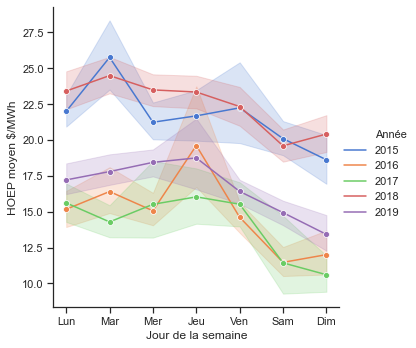

In [17]:
import numpy as np
import pandas as pd
from datetime import datetime
from typing import List
%matplotlib inline  

import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 
from IPython.display import Image
sns.set()

df = df.rename(columns={"Year":"Année"})

# Value of storage plot
with sns.axes_style("ticks", {"grid.color": "white"}):
    sns.set_palette("bright")
    g = sns.relplot(x="Weekday", y="HOEP", hue='Année',marker='o', kind='line',
                    palette="muted", legend="full", data=df)
    plt.xticks(np.arange(0,7),('Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'))
    plt.ylabel("HOEP moyen $/MWh")
    plt.xlabel("Jour de la semaine")
    plt.savefig('HOEP_weekday2.png')

In [6]:
# Exports dataframe to csv
df.to_csv (r'C:\Users\Administrateur\Dropbox\Python\Battery algorithms\Thèse\Travail\Algorithm\RESULTS\value_storage\HOEP_2015-2019_dataset.csv', 
           index = False, header=True)